In [4]:
import pandas as pd

data = {'Unemployment_Rate': [6.1,5.8,5.7,5.7,5.8,5.6,5.5,5.3,5.2,5.2],
        'Stock_Index_Price': [1500,1520,1525,1523,1515,1540,1545,1560,1555,1565]
       }

df = pd.DataFrame(data,columns=['Unemployment_Rate','Stock_Index_Price'])


In [6]:
df.head()

,Unemployment_Rate,Stock_Index_Price
0,6.1,1500
1,5.8,1520
2,5.7,1525
3,5.7,1523
4,5.8,1515


<AxesSubplot:xlabel='Unemployment_Rate', ylabel='Stock_Index_Price'>

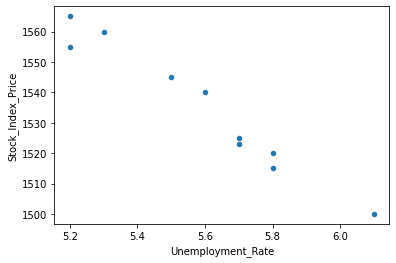

In [5]:
df.plot(x ='Unemployment_Rate', y='Stock_Index_Price', kind = 'scatter')

In [13]:
import pandas as pd

org_df = pd.read_csv('./org_csv/male.csv')

In [23]:
col_chest = org_df.head(50)['chestcircumference'] / 10
col_waist = org_df.head(50)['waistcircumference'] / 10
col_weight = org_df.head(50)['Weightlbs'] * 0.45359237
col_height = org_df.head(50)['Heightin'] * 2.54
col_gender = org_df.head(50)['Gender']
new_df = pd.concat([col_chest, col_waist, col_gender, col_height, col_weight], axis=1)
new_df.rename(columns={'Weightlbs': 'WeightKg', 'Heightin': 'HeightCm'}, inplace=True)

<AxesSubplot:xlabel='WeightKg', ylabel='HeightCm'>

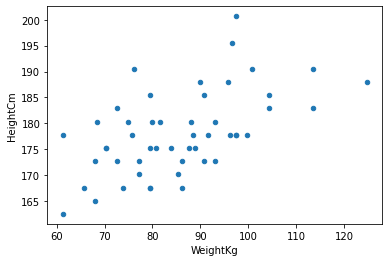

In [24]:
new_df.plot(x='WeightKg', y='HeightCm', kind='scatter')

In [25]:
sizes_values = {
    'XS': 0,
    'S': 1,
    'M': 2,
    'L': 3,
    'XL': 4,
    'XXL': 5
}


class CM:
    XS = (0, 90)
    S = (91, 96)
    M = (96, 101)
    L = (101, 106)
    XL = (106, 111)
    XXL = (111, 150)


class WM:
    XS = (0, 78)
    S = (79, 84)
    M = (84, 89)
    L = (89, 94)
    XL = (94, 99)
    XXL = (99, 120)


class CF:
    XS = (81, 85)
    S = (85, 89)
    M = (89, 94)
    L = (94, 99)
    XL = (99, 104)
    XXL = (104, 150)


class WF:
    XS = (63, 68)
    S = (68, 73)
    M = (73, 78)
    L = (78, 83)
    XL = (83, 88)
    XXL = (88, 120)


def chest_size_value(chest_c, waist_c, gender, **kwargs):
    # CM and CF - ChestMale, ChestFemale
    # WM and WF - WaistMale, WaistFemale
    # g_class - gender class
    if gender == 'Male' and kwargs['chest']:
        g_class = CM
        body_c = chest_c
    elif gender == 'Male':
        g_class = WM
        body_c = waist_c
    if gender == 'Female' and kwargs['chest']:
        g_class = CF
        body_c = chest_c
    elif gender == 'Female':
        g_class = WF
        body_c = waist_c

    if body_c > (max(g_class.M)):
        if body_c > (max(g_class.XL)):
            return sizes_values['XXL']
        elif body_c < (min(g_class.XL)):
            return sizes_values['L']
        else:
            return sizes_values['XL']
    elif body_c > (max(g_class.S)):
        return sizes_values['M']
    elif body_c < (min(g_class.S)):
        return sizes_values['XS']
    else:
        return sizes_values['S']


def size(chest_c, waist_c, gender):
    values_sizes = {
        0: 'XS',
        1: 'S',
        2: 'M',
        3: 'L',
        4: 'XL',
        5: 'XXL'
    }
    chest_size_c_value = chest_size_value(chest_c, waist_c, gender, chest=True)
    chest_size_w_value = chest_size_value(chest_c, waist_c, gender, chest=False)
    person_size = values_sizes[max(chest_size_w_value, chest_size_c_value)]
    return person_size


class Person:
    def __init__(self, chest_c, waist_c, gender, height, weight):
        self.chest_c = chest_c
        self.waist_c = waist_c
        self.gender = gender
        self.size = size(chest_c, waist_c, gender)
        self.height = height
        self.weight = weight




In [26]:

h_w_df = pd.concat([col_height, col_weight], axis=1)
h_w_df.rename(columns={'Weightlbs': 'WeightKg', 'Heightin': 'HeightCm'}, inplace=True)

In [27]:
df = new_df.reset_index()  # make sure indexes pair with number of rows
persons = []
for index, row in new_df.iterrows():
    persons.append(
        Person(row['chestcircumference'], row['waistcircumference'], row['Gender'], row['HeightCm'], row['WeightKg']))

In [28]:
h_w_df.head()

,HeightCm,WeightKg
0,180.34,81.646627
1,172.72,72.574779
2,172.72,92.986436
3,167.64,79.378665
4,195.58,96.615175


<AxesSubplot:xlabel='WeightKg', ylabel='HeightCm'>

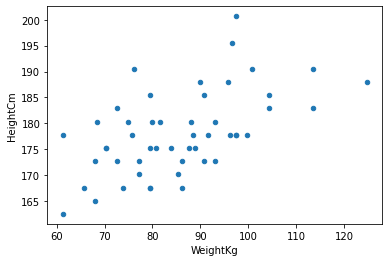

In [29]:
h_w_df.plot(x='WeightKg', y='HeightCm', kind='scatter')

In [88]:
from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

df_list = h_w_df.values.tolist()        #Dataframe to list

row0 = df_list[0]       #Test row

def get_neighbors(train, test_row, num_neighbors):
    dis_values = list()
    for train_row in train:
        dis = euclidean_distance(test_row, train_row)
        dis_values.append(dis)

    #sorted_dis_values = sorted(dis_values, key = float)
    sorted_dis_values = sorted(dis_values, key = lambda x:float(x))
    print()
    list_neighbors = list()
    for i in range(num_neighbors):
        list_neighbors.append(sorted_dis_values[i][0])
    return list_neighbors

neighbors = get_neighbors(df_list, df_list[0], 3)
#print(neighbors)

TypeError: 'float' object is not subscriptable